In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import bayes3d as b3d
import trimesh
import os
from bayes3d._mkl.utils import *
import matplotlib.pyplot as plt
import numpy as np

In [10]:
import jax
from jax import jit, vmap
import jax.numpy as jnp


key = jax.random.PRNGKey(0)

In [21]:
_scaling  = 1e-3
model_dir = os.path.join(b3d.utils.get_assets_dir(),"bop/ycbv/models")

meshes = []
for idx in range(1,22):
    mesh_path = os.path.join(model_dir,"obj_" + "{}".format(idx).rjust(6, '0') + ".ply")
    mesh = trimesh.load(mesh_path)
    mesh.vertices *= _scaling 
    meshes.append(mesh)


mesh_path = os.path.join(b3d.utils.get_assets_dir(), "sample_objs/cube.obj")
mesh = trimesh.load(mesh_path)
mesh.vertices *= 1e-1
meshes.append(mesh)


In [22]:
mesh = meshes[-1]

print(mesh)
print(mesh.visual)
print(hasattr(mesh.visual, "material"))

<trimesh.Trimesh(vertices.shape=(24, 3), faces.shape=(12, 3), name=`cube.obj`)>
False


In [23]:
if isinstance(mesh.visual, trimesh.visual.color.ColorVisuals):
    print(trimesh.visual.color.ColorVisuals)
    texvis = mesh.visual.to_texture()
elif isinstance(mesh.visual, trimesh.visual.texture.TextureVisuals):
    print(trimesh.visual.texture.TextureVisuals)
    texvis = mesh.visual

<class 'trimesh.visual.color.ColorVisuals'>


In [24]:
texvis.material.to_color?

mesh.faces.shape, mesh.vertices.shape, texvis.uv.shape

((12, 3), (24, 3), (24, 2))

Signature: texvis.material.to_color(uv)
Docstring: <no docstring>
File:      /opt/conda/envs/chi/lib/python3.10/site-packages/trimesh/visual/material.py
Type:      method

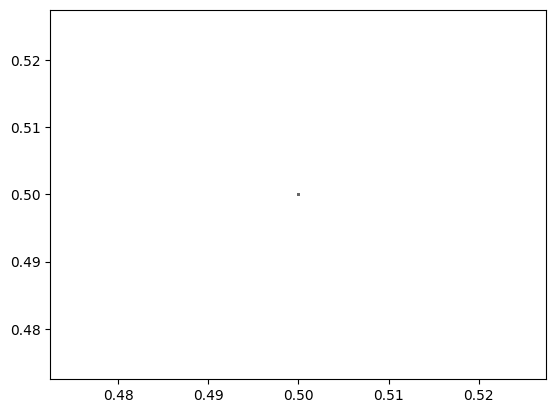

In [25]:
uv = texvis.uv
cs = texvis.material.to_color(uv)
cs = cs/255

# ================================
plt.scatter(*uv.T, c=cs, s=1)